In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ad=pd.read_csv('advertising.csv')
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
ad.shape

(200, 4)

In [4]:
ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

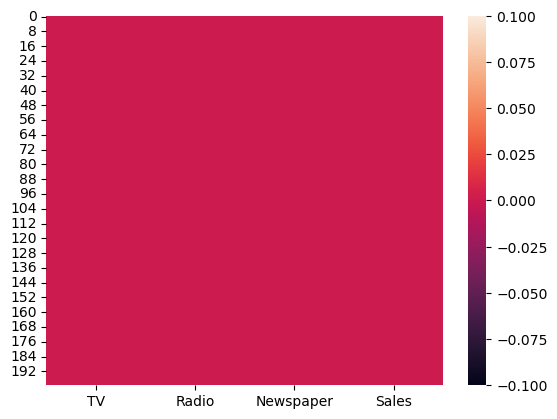

In [6]:
# CHECKING NULL VALUES USING HEATMAP
import matplotlib.pyplot as plt
sns.heatmap(ad.isnull())

In [9]:
### CHECKING COLUMNS NAMES
ad.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


OBSERVATION - There is a huge different 75% and maximum in column newspaper, so possibly outliers present.

The minimum sales is 1.60 and maximum is 27


In [12]:
# CHECKING CORELATION
ad_cor=ad.corr()
ad_cor

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


We can see correlation between two colunms using above data


<Axes: >

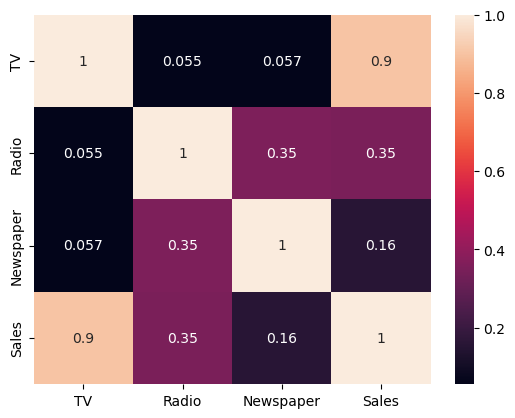

In [13]:
# USE HEATMAP TO CHECK CORRELATION FOR BETTER UNDERSTANDING 
sns.heatmap(data=ad_cor,annot=True)

OBSERVATION - We can see there is a little high correlation between tv and sales, and very low correlation between newspaper and sales.

### DATA VISUALIZATION


UNIVARIATE ANALYSIS

In [17]:
# CHECKING TOTAL AMOUNT SPENT ON TV, RADIO AND NEWSPAPER
print('Amount spent on radio:',ad['Radio'].sum())
print('Amount spent on radio:',ad['Newspaper'].sum())
print('Amount spent on radio:',ad['Sales'].sum())
print('Amount spent on radio:',ad['TV'].sum())

Amount spent on radio: 4652.800000000001
Amount spent on radio: 6110.799999999999
Amount spent on radio: 3026.1000000000004
Amount spent on radio: 29408.5


OBSERVATION - We can see highest amount spent on tv

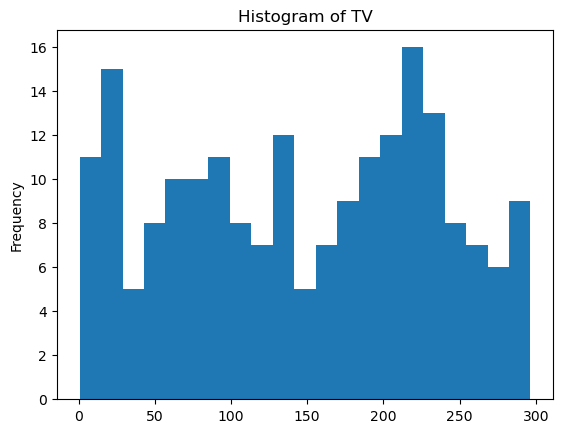

In [19]:
ad['TV'].plot.hist(bins=21)
plt.title('Histogram of TV')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

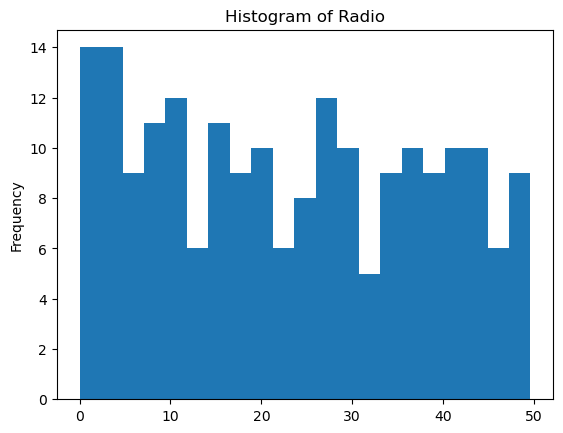

In [21]:
ad['Radio'].plot.hist(bins=21)
plt.title('Histogram of Radio')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

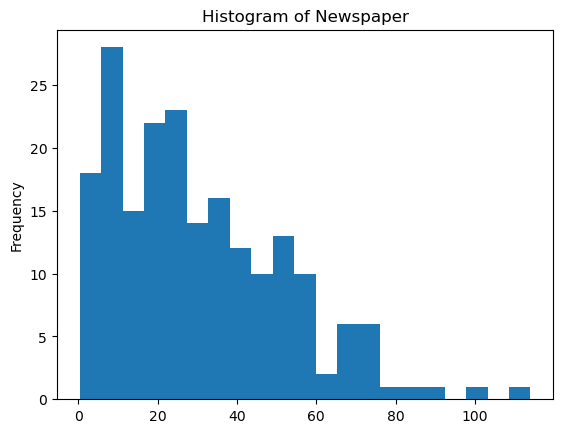

In [22]:
ad['Newspaper'].plot.hist(bins=21)
plt.title('Histogram of Newspaper')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

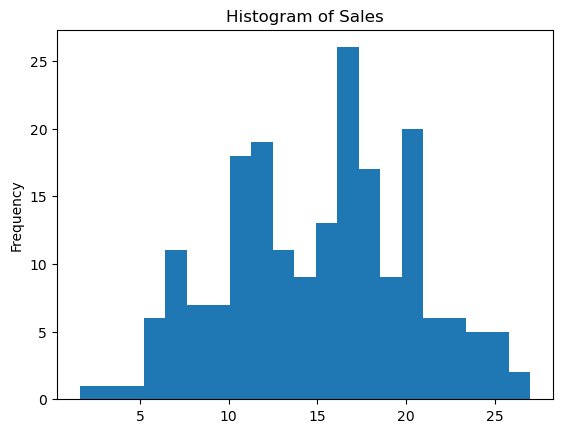

In [23]:
ad['Sales'].plot.hist(bins=21)
plt.title('Histogram of Sales')
plt.show

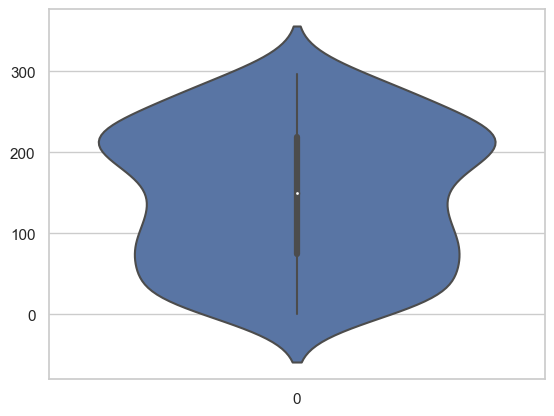

In [24]:
sns.set(style='whitegrid')
sns.violinplot(ad['TV'])
plt.show()

OBSERVATION- We can see that average 180 to 240(in thousands of dollars) spent on advertising on their products


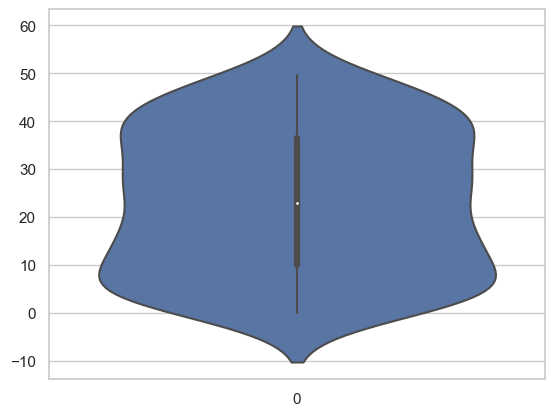

In [25]:
sns.set(style='whitegrid')
sns.violinplot(ad['Radio'])
plt.show()

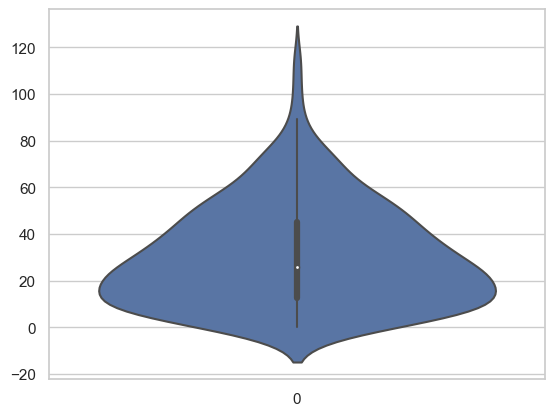

In [26]:
sns.set(style='whitegrid')
sns.violinplot(ad['Newspaper'])
plt.show()

## BIVARIATE ANALYSIS

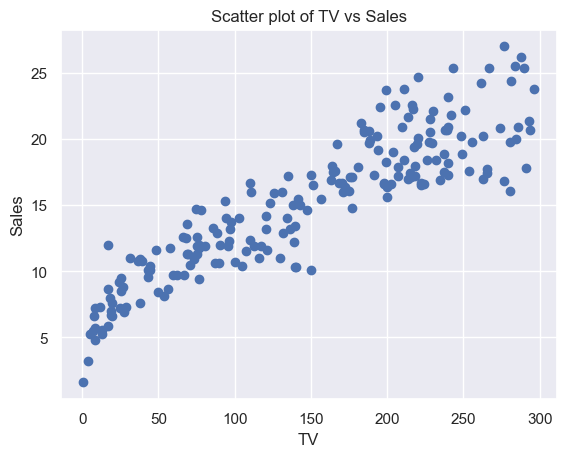

In [27]:
# CHECKING RELATIONSHIP BETWEEN ADVERTISING CHANNEL AND SALE USING SCATTER PLOT AND PAIRsns.set
sns.set(style='darkgrid')
plt.scatter(ad['TV'],ad['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter plot of TV vs Sales')
plt.show()

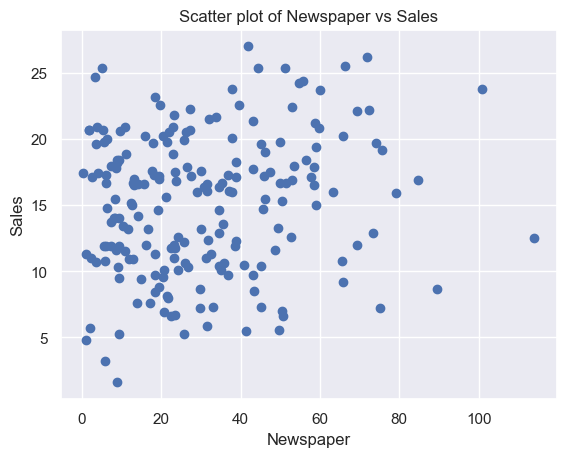

In [28]:
sns.set(style='darkgrid')
plt.scatter(ad['Newspaper'],ad['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Scatter plot of Newspaper vs Sales')
plt.show()

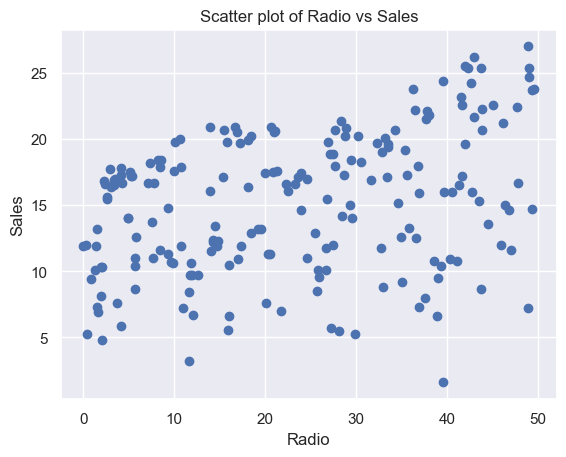

In [29]:
sns.set(style='darkgrid')
plt.scatter(ad['Radio'],ad['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Scatter plot of Radio vs Sales')
plt.show()

OBSERVATION - We can see there is very low relation between radio and sales, the graph shows more amount spent on radio, the sales didnt increase

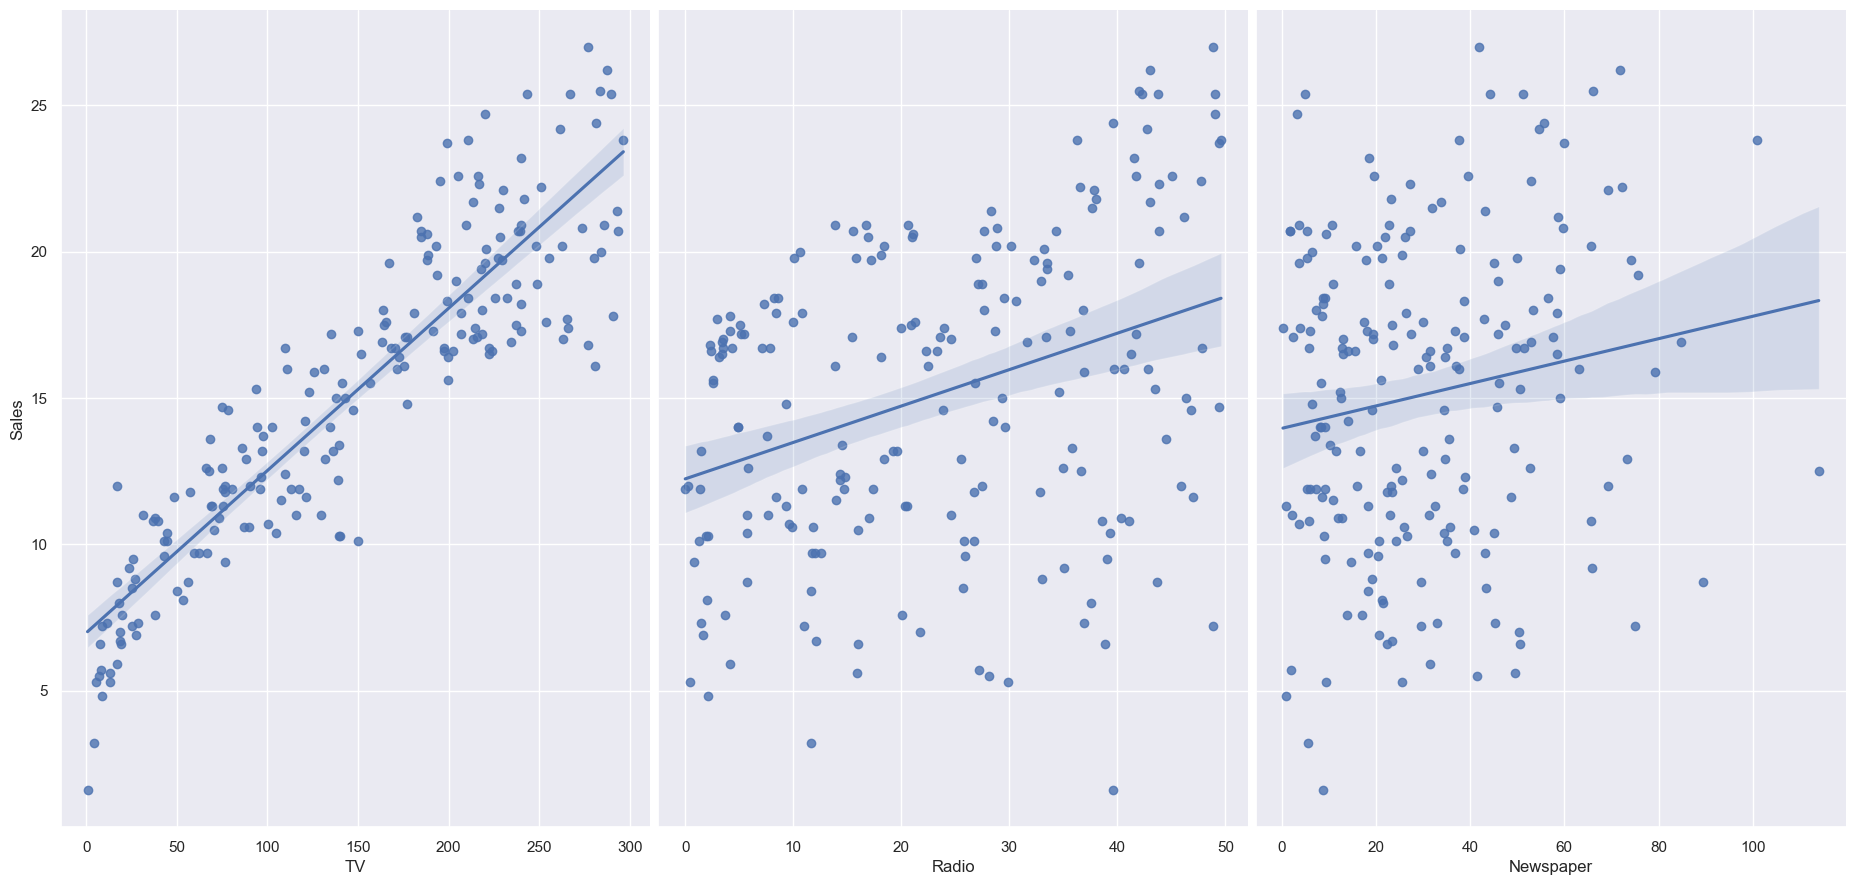

In [33]:
sns.pairplot(ad, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=9, aspect=0.7, kind='reg')

### PLOTTING OUTLIER 

<Axes: >

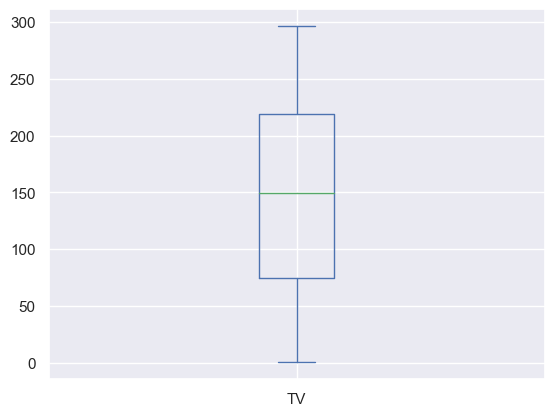

In [34]:
ad['TV'].plot.box()

<Axes: >

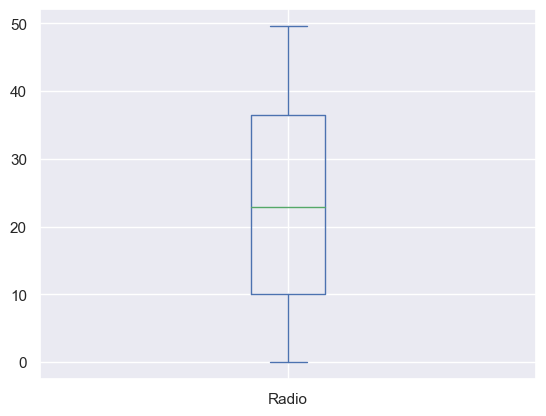

In [35]:
ad['Radio'].plot.box()

<Axes: >

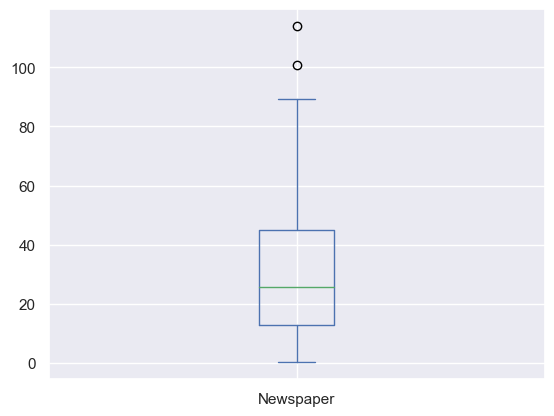

In [36]:
ad['Newspaper'].plot.box()

## OBSERVATION- There are outlier noted in newspaper

### CHECK THE DISTRIBUTION OF SKEWNESS


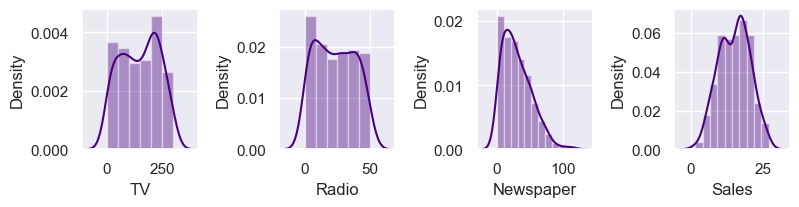

In [41]:
collist=ad.columns.values
ncol=10
nrow=5

plt.figure(figsize=(20,10))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(ad[collist[i]],color='indigo')
    plt.tight_layout()

In [40]:
#CHECKING SKEWNESS
ad.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

In [44]:
# TREATING SKEWNESS VIA LOG METHOD

for col in ad.columns:
    if ad[col].skew()>0.55:
        ad[col]=np.log1p(ad[col])
        

In [45]:
# CHECKING SKWENESS AGAIN
ad.skew()

TV          -0.069853
Radio        0.094175
Newspaper   -0.799875
Sales       -0.073739
dtype: float64

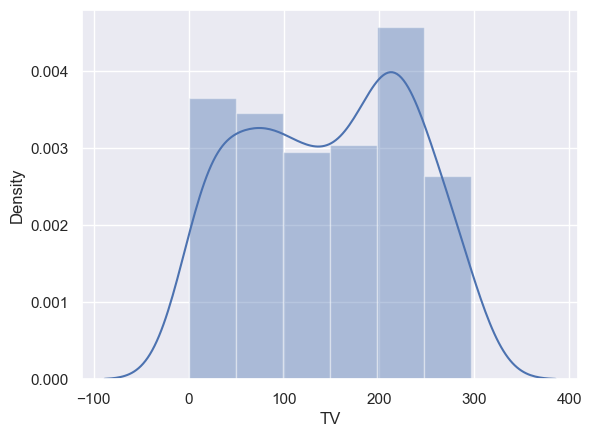

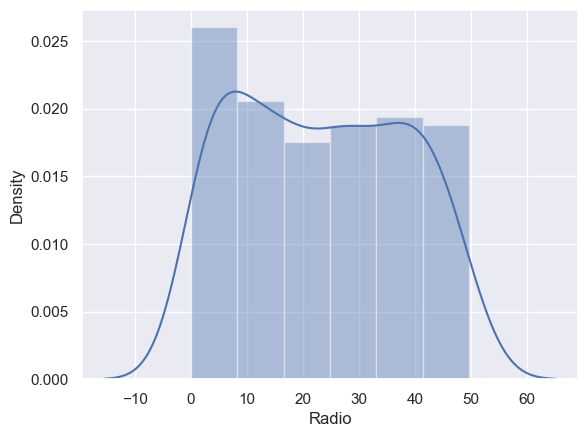

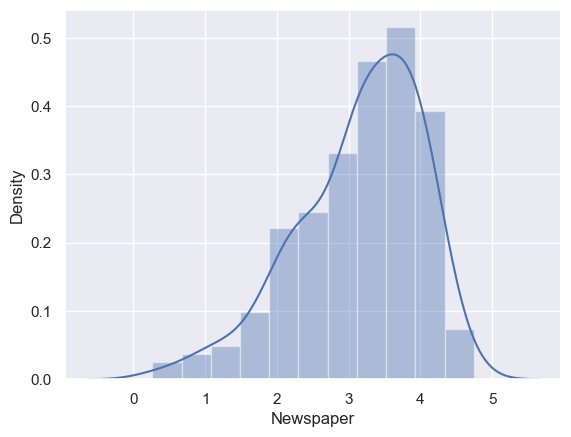

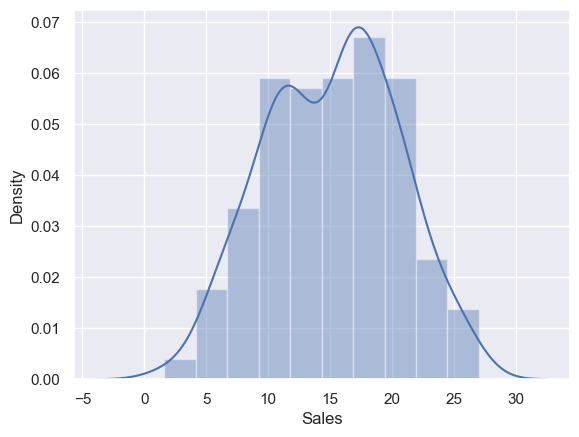

In [46]:
for i in ad.columns:
    sns.distplot(ad[i])
    plt.show()

### REMOVING OUTLIERS

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(ad))
z

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.270548,1.322319
1,1.197376,1.082808,0.784008,0.897515
2,1.516155,1.528463,1.272195,0.593948
3,0.052050,1.217855,1.079221,0.259834
4,0.394182,0.841614,1.077274,0.525455
...,...,...,...,...
195,1.270941,1.321031,0.530505,1.428757
196,0.617035,1.240003,1.093193,0.214489
197,0.349810,0.942899,1.332444,0.062706
198,1.594565,1.265121,1.220018,1.967398


In [48]:
treshold=3
print(np.where(z>3))

(array([33], dtype=int64), array([2], dtype=int64))


In [49]:
ad_new=ad[(z<3).all(axis=1)]

In [50]:
print(ad.shape)

(200, 4)


In [51]:
print(ad_new.shape)

(199, 4)


OBSERVATION - we can see one row removed from database due to outliers

### FROM OUR ANALYSIS INVESTING IN TV ADVERTISEMENTS CONTRIBUTED MORE TO OUR SALES.

### I WOULD ADVISE WE SPEND MORE ON TV ADVERTS AND CUT SPENDING ON NEWSPAPER AND RADIO ADVERTS